In [24]:
import pandas as pd
import numpy as np
## plotting libraries
from matplotlib import pyplot as plt
import seaborn as sns
## Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
df = pd.read_csv("DATA_Customer-Churn.csv")

In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].apply(lambda x: x.strip()))

In [7]:
#df.isnull().any()
df = df.dropna()
df.isna().value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  MonthlyCharges  TotalCharges  Churn
False   False          False    False       False   False         False           False         False             False        False        False            False     False           False         False    7032
dtype: int64

In [8]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [9]:
cols_to_keep = ["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges", "Churn"]
df2 = df[cols_to_keep]

# split the dataset

In [10]:
# X-y split
X = df2[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = df2["Churn"].map({"Yes" : 1, "No" : 0})

In [11]:
# define functions for splitting
def split_the_shit(X, y):
    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
    # select numerical columns
    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test  = pd.DataFrame(X_test, columns=X.columns)
    return X_train, X_test, y_train, y_test

# ...and scaling
def scale_fct(X_train):
    # now transform with StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled = scaler.transform(X_train)
    return pd.DataFrame(X_scaled, columns=X_train.columns)

In [12]:
# apply test-train split
X_train, X_test, y_train, y_test = split_the_shit(X, y)

In [13]:
# apply standard scaler
X_scaled = scale_fct(X_train)

fit and predict model

In [14]:
model = KNeighborsClassifier(n_neighbors=2, weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test) # predict test
y_pred_train = model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

confusion matrix

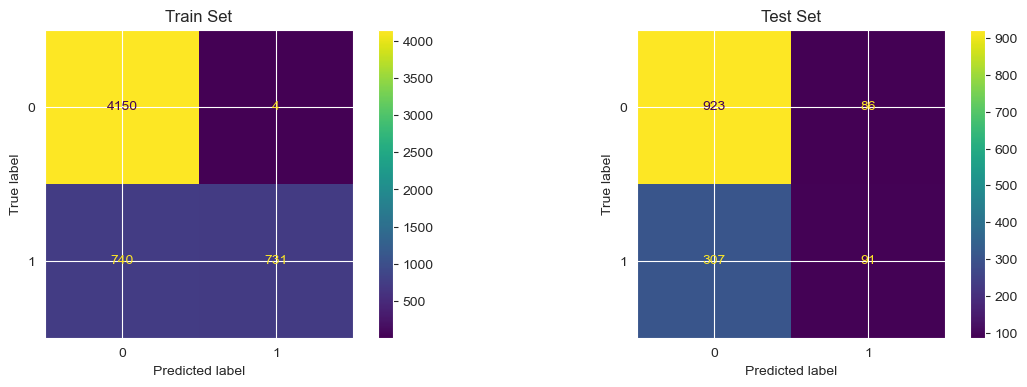

In [15]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [16]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

In [17]:
## calling the function
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted = evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.87,0.72
1,Precision,0.99,0.51
2,Recall,0.50,0.23


# logistic regression model

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.66,0.68
2,Recall,0.44,0.44


Confusion matrix for the train set
[[3815  339]
 [ 818  653]]


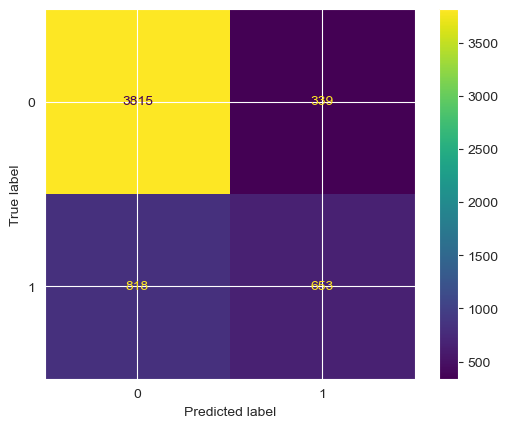



Confusion matrix for the test set
[[925  84]
 [223 175]]


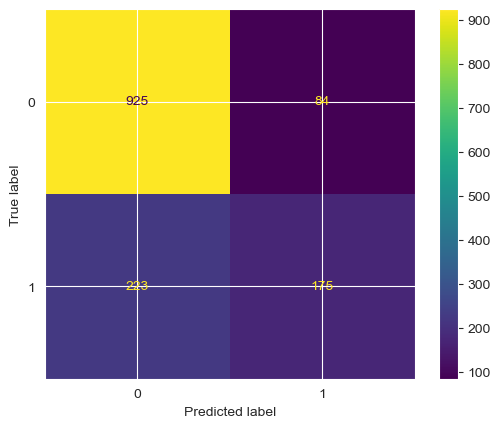

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

log_model = LogisticRegression()

## Data splitting
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

# Round 2

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

depth = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

def dt_depth(depth):
    dt = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

    for d in depth:
        # Bear in mind that sklearn uses a different function for decision trees used for
        # classification ( to predict a categorical feature ): DecisionTreeClassifier()
        model = DecisionTreeClassifier(max_depth=d)

        model.fit(X_train, y_train)

        y_pred_train_dt = model.predict(X_train)
        y_pred_test_dt = model.predict(X_test)


        dt[d] = {'Train':   {'Accuracy' : accuracy_score(y_train, y_pred_train_dt),
                            'Precision' : precision_score(y_train, y_pred_train_dt),
                            'Recall' : recall_score(y_train, y_pred_train_dt)
                             },
                'Test':    {'Accuracy' : accuracy_score(y_test, y_pred_test_dt),
                            'Precision' : precision_score(y_test, y_pred_test_dt),
                            'Recall' : recall_score(y_test, y_pred_test_dt)
                             }
                }
    return dt
dt_dct = dt_depth(depth)
dt_dct

{2: {'Train': {'Accuracy': 0.7895111111111112,
   'Precision': 0.6538049303322615,
   'Recall': 0.41468388851121685},
  'Test': {'Accuracy': 0.759772565742715,
   'Precision': 0.625,
   'Recall': 0.3768844221105528}},
 3: {'Train': {'Accuracy': 0.7895111111111112,
   'Precision': 0.6538049303322615,
   'Recall': 0.41468388851121685},
  'Test': {'Accuracy': 0.759772565742715,
   'Precision': 0.625,
   'Recall': 0.3768844221105528}},
 4: {'Train': {'Accuracy': 0.7939555555555555,
   'Precision': 0.6270358306188925,
   'Recall': 0.5234534330387491},
  'Test': {'Accuracy': 0.7633262260127932,
   'Precision': 0.5981873111782477,
   'Recall': 0.49748743718592964}},
 5: {'Train': {'Accuracy': 0.8032,
   'Precision': 0.6537162162162162,
   'Recall': 0.5261726716519375},
  'Test': {'Accuracy': 0.7569296375266524,
   'Precision': 0.5897435897435898,
   'Recall': 0.4623115577889447}},
 6: {'Train': {'Accuracy': 0.8112,
   'Precision': 0.6934720908230843,
   'Recall': 0.4983004758667573},
  'Test'

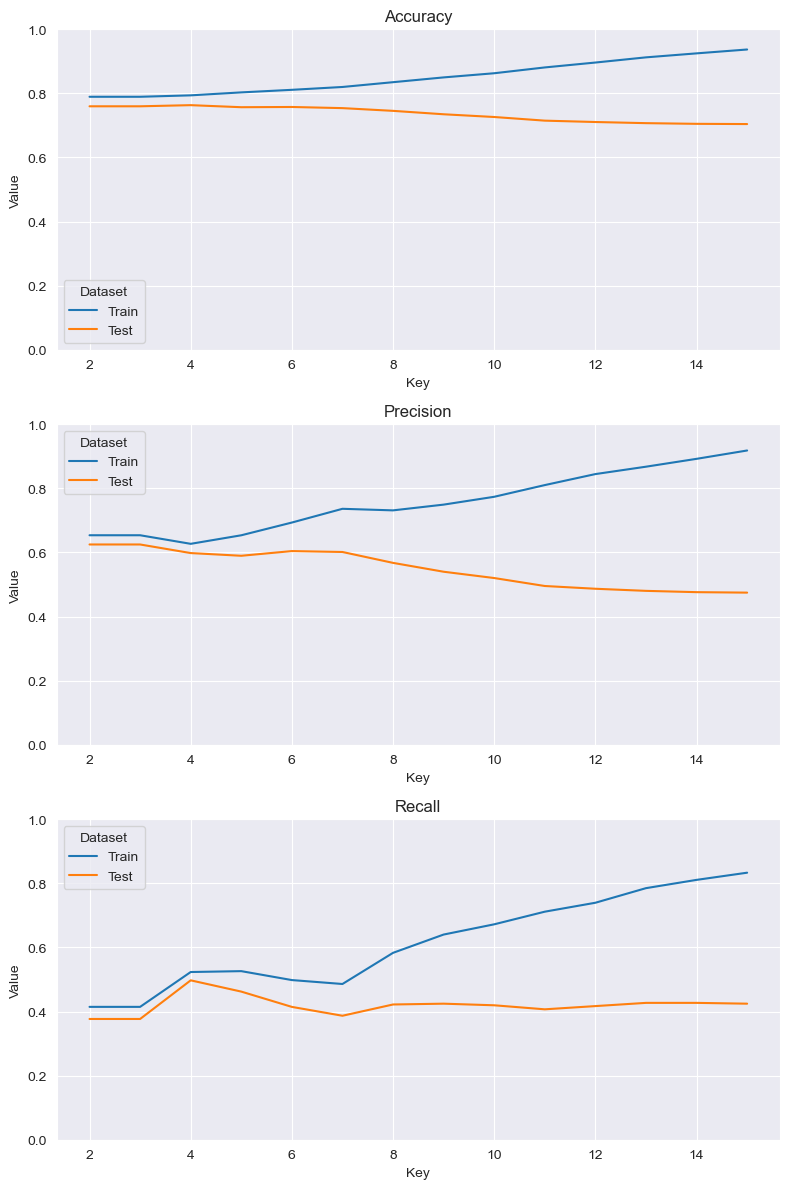

In [25]:
# Convert the nested dictionary to a pandas DataFrame
data = []
for key, val in dt_dct.items():
    row = {"key": key}
    row.update(val["Train"])
    row.update({"Dataset": "Train"})
    data.append(row)
    row = {"key": key}
    row.update(val["Test"])
    row.update({"Dataset": "Test"})
    data.append(row)
df = pd.DataFrame(data)

# Create a figure with three subplots
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(8, 12))

# Plot the data in each subplot
sns.lineplot(x="key", y="Accuracy", hue="Dataset", data=df, ax=axs[0])
axs[0].set_title("Accuracy")
axs[0].set_xlabel("Key")
axs[0].set_ylabel("Value")
axs[0].set_ylim(0, 1)

sns.lineplot(x="key", y="Precision", hue="Dataset", data=df, ax=axs[1])
axs[1].set_title("Precision")
axs[1].set_xlabel("Key")
axs[1].set_ylabel("Value")
axs[1].set_ylim(0, 1)

sns.lineplot(x="key", y="Recall", hue="Dataset", data=df, ax=axs[2])
axs[2].set_title("Recall")
axs[2].set_xlabel("Key")
axs[2].set_ylabel("Value")
axs[2].set_ylim(0, 1)

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

,Error_metric,Train,Test
0,Accuracy,0.811200,0.757640
1,Precision,0.693472,0.604396
2,Recall,0.498300,0.414573


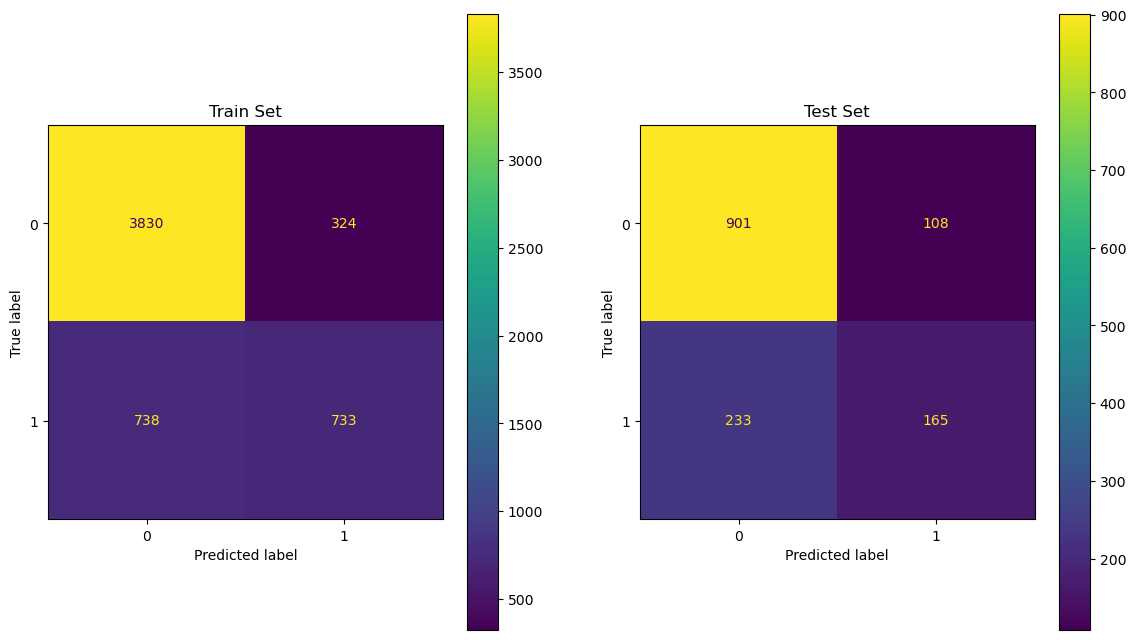

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for
# classification ( to predict a categorical feature ): DecisionTreeClassifier()
model = DecisionTreeClassifier(max_depth=6)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))

#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

plot feature importances

<BarContainer object of 4 artists>

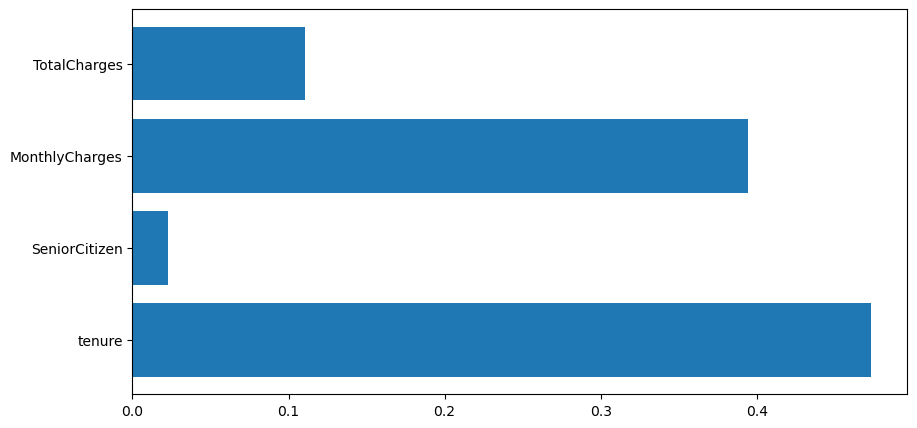

In [13]:
plt.figure(figsize=(10,5))
plt.barh(X.columns,model.feature_importances_)

decision tree

In [ ]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(model,filled = True, rounded=True)
plt.show()

error metrics

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def performance_model(y_train, y_test, y_pred_train, y_pred_test):

    # Model validation y_train - y_pred_train
    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'Predicted_value': y_pred_test})

    return performance, df_train, df_test

In [10]:
def create_phone_number(n):
    #your code here
    string = ""
    for num in n:
        string += str(num)
        print(string)
    return "(" + string[0:3] + ") " + string[3:]
create_phone_number([1,2,3,5])

1
12
123
1235


'(123 )5'

In [19]:
performance, _ ,_ = performance_model(y_train, y_test, y_pred_train, y_pred_test_dt)
performance

,Error_metric,Train,Test
0,Mean error,0.13,0.11
1,Mean absolute error,0.13,0.24
2,Mean squared error,0.13,0.24
3,Root mean squared error,0.36,0.49
4,Mean absolute percentual error,inf,inf
5,R2,0.32,-0.18
